In [60]:
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, ZeroPadding2D, Dropout, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist


In [8]:
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    import os
    import gzip
    import numpy as np

    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 28, 28)

    return images, labels

In [26]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [27]:
x_train.shape

(60000, 28, 28)

In [28]:
x_train[29]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  59,
         48,  43,  57,   8,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 214, 244,
        219, 217, 227, 219,   0,   0,   2,   1,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   0,   0,   6,   0,   0, 118, 227, 220,
        224, 219, 224, 223, 202,   0,   0,   0,   5,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,   0, 158, 207, 203, 224,
        211, 197, 224, 195, 219, 196,  65,   0,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   0,   0,  90, 182, 192, 179, 210, 218,
        236, 251, 226, 202, 213, 203, 208, 161,  65,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 153, 195, 178, 165, 171, 208, 199,
        220, 232, 214, 206, 190, 182, 179, 190, 207, 135,   0,   0,   0,
          0,   0],
       [  

In [29]:
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [33]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [30]:
x_train[29]      

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 59],
        [ 48],
        [ 43],
        [ 57],
        [  8],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [214],
        [244],
        [219],
        [217],
        [227],
        [219],
        [  0],
        [  0],
        [  2],
        [  1],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  1],
        [  0],
        [  0],
        [  6],
        [  0],
        [  0],
      

In [31]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [34]:
model = Sequential([
    ZeroPadding2D(padding=(1,1), input_shape=(28,28,1)),
    Conv2D(32, 3, activation='relu'),
    Dropout(0.2),
    MaxPool2D(pool_size=2, strides=2),
    ZeroPadding2D(padding=(1,1)),
    Conv2D(64, 3, activation='relu'),
    Dropout(0.2),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

c:\Users\sinah\anaconda\Lib\site-packages\keras\src\layers\reshaping\zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ zero_padding2d (ZeroPadding2D)  │ (None, 30, 30, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_1                │ (None, 16, 16, 32)     │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)
print(y_train.shape,y_train_ohe.shape)

(60000,) (60000, 10)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [40]:
result = model.fit(x_train,y_train_ohe, epochs=5, validation_data=(x_test,y_test_ohe), batch_size=300)

Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 37s 187ms/step - accuracy: 0.8963 - loss: 0.2880 - val_accuracy: 0.8994 - val_loss: 0.2759
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 41s 204ms/step - accuracy: 0.9015 - loss: 0.2726 - val_accuracy: 0.9016 - val_loss: 0.2814
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 33s 164ms/step - accuracy: 0.9042 - loss: 0.2634 - val_accuracy: 0.9095 - val_loss: 0.2632
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 35s 173ms/step - accuracy: 0.9094 - loss: 0.2518 - val_accuracy: 0.9109 - val_loss: 0.2582
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 34s 167ms/step - accuracy: 0.9124 - loss: 0.2412 - val_accuracy: 0.9104 - val_loss: 0.2511


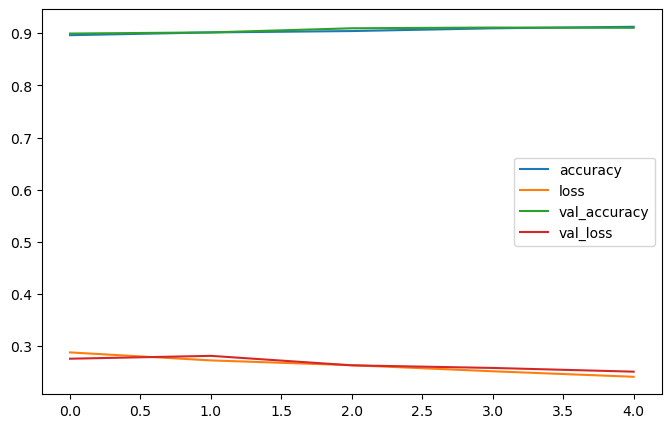

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(result.history).plot(figsize=(8,5))
plt.show()

In [48]:
result.history

{'accuracy': [0.8962666392326355,
  0.901533305644989,
  0.9041833281517029,
  0.9094333052635193,
  0.9123833179473877],
 'loss': [0.28797826170921326,
  0.27264097332954407,
  0.26344963908195496,
  0.25177374482154846,
  0.2412489354610443],
 'val_accuracy': [0.899399995803833,
  0.9016000032424927,
  0.909500002861023,
  0.9108999967575073,
  0.9103999733924866],
 'val_loss': [0.27589312195777893,
  0.28136712312698364,
  0.26318109035491943,
  0.25818943977355957,
  0.2510511577129364]}

In [50]:
model.save('fashion.h5')

In [61]:
keras.saving.save_model(model, 'fashion.keras')